# Predição da nota dos episódios do Naruto


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('naruto_ratings_data_v02.csv')
df.head()

,episode_number_overall,season,episode_number_in_season,Title,Directed by,Written by,original_air_date,english_air_date,rating,votes,description
0,1,1,1,"""Homecoming""Transcription: ""Kikyō"" (Japanese: 帰郷)",Masaaki Kumagai,Satoru Nishizono,2007-02-15,2009-10-28,8.2,759,Naruto returns to Konoha after a two-and-a-hal...
1,2,1,2,"""The Akatsuki Makes Its Move""Transcription: ""A...",Atsushi Nigorikawa,Satoru Nishizono,2007-02-15,2009-10-28,8.0,596,Kakashi gives Naruto and Sakura a test to see ...
2,3,1,3,"""The Results of Training""Transcription: ""Shugy...",Yuki Sugihara,Satoru Nishizono,2007-02-22,2009-10-28,8.0,527,Sakura and Naruto both demonstrate their newly...
3,4,1,4,"""The Jinchuriki of the Sand""Transcription: ""Su...",Kiyomu Fukuda,Satoru Nishizono,2007-03-01,2009-10-28,8.2,535,"Gaara is quick to detect Deidara's presence, a..."
4,5,1,5,"""The Kazekage Stands Tall""Transcription: ""Kaze...",Yuki Kinoshita,Satoru Nishizono,2007-03-15,2009-11-04,8.2,502,Naruto and Sakura defeat Kakashi in the surviv...


In [4]:
df.shape

(500, 11)

In [5]:
df.describe()

,episode_number_overall,season,episode_number_in_season,rating,votes
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,11.520000,15.088000,7.287000,385.320000
std,144.481833,6.347455,12.248605,0.966561,286.787021
min,1.000000,1.000000,1.000000,4.200000,168.000000
25%,125.750000,6.000000,6.000000,6.500000,227.000000
50%,250.500000,12.000000,13.000000,7.600000,306.500000
75%,375.250000,18.000000,20.000000,8.025000,413.000000
max,500.000000,21.000000,66.000000,9.200000,2947.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   episode_number_overall    500 non-null    int64  
 1   season                    500 non-null    int64  
 2   episode_number_in_season  500 non-null    int64  
 3   Title                     500 non-null    object 
 4   Directed by               500 non-null    object 
 5   Written by                500 non-null    object 
 6   original_air_date         500 non-null    object 
 7   english_air_date          370 non-null    object 
 8   rating                    500 non-null    float64
 9   votes                     500 non-null    int64  
 10  description               500 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 43.1+ KB


C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\project_ufabc_mestrado\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Written by', ylabel='count'>

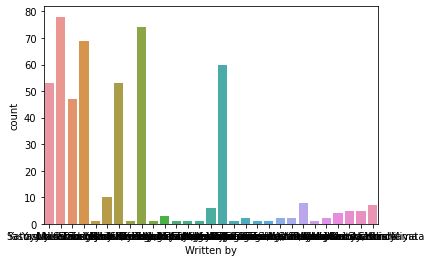

In [8]:
sns.countplot(df['Written by'])

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\project_ufabc_mestrado\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


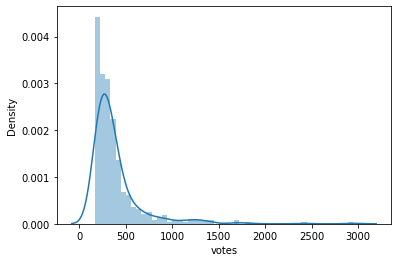

In [34]:
# plt.rc('figure', figsize = (10,5))
ax = sns.distplot(df['votes'])


Teve episódios que tiveram muitos votos, e outros que tiveram bem poucos

C:\Users\LauraDamacenoDeAlmei\Anaconda3\envs\project_ufabc_mestrado\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


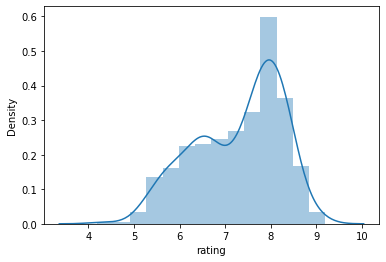

In [31]:
# plt.rc('figure', figsize = (10,5))
ax = sns.distplot(df['rating'])


In [32]:
skewness = df['rating'].skew()

skewness

-0.5080205620835153

distribuição tem assimetria negativa, ou seja, a cauda esquerda é mais longa do que a cauda direita

In [33]:
df['rating'].kurt()

-0.6782208029843497

In [9]:
df['Written by'].unique()

array(['Satoru Nishizono', 'Yasuyuki Suzuki', 'Junki Takegami',
       'Masahiro Hikokubo', 'Yasuyuki Suzuki,Masahiro Hikokubo',
       'Toshiyuki Tsuru', 'Yuka Miyata', 'Shin Yoshida,Yasuyuki Suzuki',
       'Shin Yoshida', 'Shin Yoshida,Yuka Miyata',
       'Junki Takegami,Shin Yoshida', 'Junki Takegami,Yuka Miyata',
       'Shin Yoshida,Junki Takegami', 'Yuka Miyata,Junki Takegami',
       'Daisuke Watanabe', 'Katsuhiko Chiba',
       'Junki Takegami,Daisuke Watanabe', 'Hideto Tanaka',
       'Katsuhiko Chiba,Yuka Miyata', 'Yasuyuki Suzuki,Shin Yoshida',
       'Shuto Tanaka,Yuka Miyata', 'Shuto Tanaka',
       'Junki Takegami,Yasuyuki Suzuki',
       'Junki Takegami,Yasuyuki Suzuki,Yuka Miyata', 'Yasuaki Kurozu',
       'Osamu Kobayashi', 'Masanao Akahoshi', 'Masaya Honda',
       'Kento Shimoyama'], dtype=object)

In [10]:
df['Directed by'].unique()

array(['Masaaki Kumagai', 'Atsushi Nigorikawa', 'Yuki Sugihara',
       'Kiyomu Fukuda', 'Yuki Kinoshita', 'Mitsutaka Noshitani',
       'Hayato Goda', 'Hiroshi Kimura', 'Eitaro Ano', 'Neko Okuma',
       'Hayato Date', 'Masaki Takano', 'Shigeharu Takahashi',
       'Shinji Satou', 'Masahiko Murata', 'Kunitoshi Okajima',
       'Masaki Takuno', 'Toshiyuki Tsuru', 'Takahiro Ono',
       'Yuusuke Onoda', 'Toshiaki Kanbara', 'Masayuki Matsumoto',
       'Shuu Watanabe', 'Yuki Arie', 'Yasumi Mikamoto', 'Masahiro Takada',
       'Akitoshi Yokoyama', 'Fujiaki Asari', 'Minoru Yamaoka',
       'Eiko Nishi', 'Naoki Horiuchi', 'Hideyuki Yoshida',
       'Yoshihiro Sugai', 'Yasuhiro Minami', 'Atsushi Wakabayashi',
       'Takahiro Okao', 'Kanryou Kishikawa', 'Gorou Sessha',
       'Maki Odaira', 'Shigeru Mita', 'Chiyuki Tanaka',
       'Hiroyuki Tsuchiya', "Ken'ichi Nishida", 'Masato Kitagawa',
       "Ken'ichi Nishida,Hayato Date", 'Hideaki Uehara',
       'Mitsutoshi Satou', 'Daisuke Tsukushi',

### Quais são os escritores que tiveram maior média?

In [17]:
df.groupby(by='Written by')['episode_number_overall'].count().sort_values(ascending=False)

Written by
Yasuyuki Suzuki                               78
Shin Yoshida                                  74
Masahiro Hikokubo                             69
Katsuhiko Chiba                               60
Yuka Miyata                                   53
Satoru Nishizono                              53
Junki Takegami                                47
Toshiyuki Tsuru                               10
Junki Takegami,Yasuyuki Suzuki                 8
Kento Shimoyama                                7
Daisuke Watanabe                               6
Masaya Honda                                   5
Masanao Akahoshi                               5
Osamu Kobayashi                                4
Junki Takegami,Shin Yoshida                    3
Hideto Tanaka                                  2
Shuto Tanaka                                   2
Shuto Tanaka,Yuka Miyata                       2
Yasuaki Kurozu                                 2
Katsuhiko Chiba,Yuka Miyata                    1
Junki Tak

In [18]:
df.groupby(by='Written by')['rating'].mean().sort_values(ascending=False)

Written by
Yasuyuki Suzuki,Shin Yoshida                  9.000000
Yasuaki Kurozu                                8.450000
Katsuhiko Chiba,Yuka Miyata                   8.300000
Shuto Tanaka                                  8.200000
Satoru Nishizono                              7.781132
Shin Yoshida                                  7.528378
Junki Takegami,Shin Yoshida                   7.500000
Masahiro Hikokubo                             7.498551
Masanao Akahoshi                              7.460000
Kento Shimoyama                               7.385714
Toshiyuki Tsuru                               7.340000
Yuka Miyata                                   7.337736
Katsuhiko Chiba                               7.301667
Masaya Honda                                  7.260000
Yasuyuki Suzuki                               7.019231
Osamu Kobayashi                               6.950000
Junki Takegami                                6.891489
Yasuyuki Suzuki,Masahiro Hikokubo             6.800000

Temos autores que só escreveram 1 vez e outros que escreveram várias vezes, posso remover as colaborações. Ou desconsiderar essa coluna na predicão.


In [20]:
indexNames = df[(df['Written by'] == 'Junki Takegami,Yasuyuki Suzuki')| (df['Written by'] == 'Junki Takegami,Yasuyuki Suzuki,Yuka Miyata')|
               (df['Written by'] == 'Junki Takegami,Daisuke Watanabe')| (df['Written by'] == 'Shuto Tanaka,Yuka Miyata')| (df['Written by'] == 'Junki Takegami,Yuka Miyata')|
               (df['Written by'] == 'Shin Yoshida,Yuka Miyata')|(df['Written by'] == 'Shin Yoshida,Yasuyuki Suzuki')| (df['Written by'] == 'Shin Yoshida,Junki Takegami')|
               (df['Written by'] == 'Yuka Miyata,Junki Takegami')|(df['Written by'] == 'Yasuyuki Suzuki,Masahiro Hikokubo')| (df['Written by'] == 'Junki Takegami,Shin Yoshida')
               |(df['Written by'] == 'Katsuhiko Chiba,Yuka Miyata') | (df['Written by'] == 'Yasuyuki Suzuki,Shin Yoshida')].index
# Delete these row indexes from dataFrame
df_sem_colab = df.drop(indexNames)
df_sem_colab.shape

(477, 11)

In [22]:
df_sem_colab['Written by'].unique()

array(['Satoru Nishizono', 'Yasuyuki Suzuki', 'Junki Takegami',
       'Masahiro Hikokubo', 'Toshiyuki Tsuru', 'Yuka Miyata',
       'Shin Yoshida', 'Daisuke Watanabe', 'Katsuhiko Chiba',
       'Hideto Tanaka', 'Shuto Tanaka', 'Yasuaki Kurozu',
       'Osamu Kobayashi', 'Masanao Akahoshi', 'Masaya Honda',
       'Kento Shimoyama'], dtype=object)

Nao tive uma perda grande então vou seguir com os episódios sem colaboração entre escritores

### Quais são os diretores que tiveram maior média?

In [23]:
df_sem_colab.columns

Index(['episode_number_overall', 'season', 'episode_number_in_season', 'Title',
       'Directed by', 'Written by', 'original_air_date', 'english_air_date',
       'rating', 'votes', 'description'],
      dtype='object')

In [27]:
df_sem_colab.groupby(by='Directed by')['episode_number_overall'].count().sort_values(ascending=False)

Directed by
Kiyomu Fukuda         33
Masaaki Kumagai       32
Atsushi Nigorikawa    27
Hiroshi Kimura        26
Naoki Horiuchi        24
                      ..
Hideaki Uehara         1
Shingo Okano           1
Chiyuki Tanaka         1
Shougo Arai            1
Taiji Kawanishi        1
Name: episode_number_overall, Length: 111, dtype: int64

Mesmo problema do de cima, mas não temos colaborações.

In [28]:
df_sem_colab.groupby(by='Directed by')['rating'].mean().sort_values(ascending=False)

Directed by
Hiroyuki Yamashita     8.925
Chikara Sakurai        8.900
Atsushi Wakabayashi    8.800
Yasuhiro Minami        8.600
Fujii Toshiro          8.500
                       ...  
Toshihiro Maeya        5.400
Yutaka Kagawa          5.400
Takeyuki Yanase        5.200
Yoshinobu Tokumoto     5.200
Fumiaki Usui           5.200
Name: rating, Length: 111, dtype: float64

### Quais episódios tiveram a maior nota?

In [29]:
df_sem_colab.groupby(by='episode_number_in_season')['rating'].mean().sort_values(ascending=False)

episode_number_in_season
64    9.200000
63    8.900000
65    8.800000
61    8.800000
50    8.500000
        ...   
17    6.827778
33    6.800000
37    6.100000
35    5.300000
36    5.200000
Name: rating, Length: 65, dtype: float64

O numero do episódio influencia a nota?

In [ ]:
def metrica_regressor(y_test_real,model_predict_reg):
    mae = metrics.mean_absolute_error(y_test_real,model_predict_reg)
    mse = metrics.mean_squared_error(y_test_real,model_predict_reg)
    r2 = metrics.r2_score(y_test_real,model_predict_reg)
    
    model_predict_reg_alarme = (model_predict_reg > 0.6).astype(int)
    y_test_alarme = (y_test_real.squeeze() > 0.6).astype(int)
#     model_predict_reg_alarme = (model_predict_reg > 80).astype(int)
#     y_test_alarme = (y_test_real.squeeze() > 80).astype(int)
    
#     recall = metrics.recall_score(y_test_alarme,model_predict_reg_alarme)
#     prec = metrics.precision_score(y_test_alarme,model_predict_reg_alarme)
#     mcc = metrics.matthews_corrcoef(y_test_alarme,model_predict_reg_alarme)
#     f1 = metrics.f1_score(y_test_alarme,model_predict_reg_alarme)
#     conf_matrix = metrics.confusion_matrix(y_test_alarme,model_predict_reg_alarme)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('R2:', r2)
    print('---------------------------------------------------------')

In [ ]:
for model in [XGBRegressor, DecisionTreeRegressor, RandomForestRegressor,LGBMRegressor,ExtraTreesRegressor, AdaBoostRegressor,GradientBoostingRegressor, DummyRegressor,PassiveAggressiveRegressor]:
    model_reg = model()
    kfold= model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
    s= cross_validate(model_reg, X_train, y_train, return_train_score=False,
               scoring=['r2',
                        'neg_mean_absolute_error','neg_mean_squared_error'],cv=5)

    print('Modelo: {} R2: {} STD: {} MAE: {} STD: {} MSE: {} STD: {} '.format(model.__name__, s['test_r2'].mean(), s['test_r2'].std(),s['test_neg_mean_absolute_error'].mean(),s['test_neg_mean_absolute_error'].std()
                                                                              ,s['test_neg_mean_squared_error'].mean(), s['test_neg_mean_squared_error'].std()))